# DAS - UE1 - Teil 1 - Brunner Michael - se21m021

# Import necessary dependencies

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import urllib.request
import io
from scipy import stats
from IPython.core.display_functions import display
from pandas.plotting import parallel_coordinates

%matplotlib inline

# Load and merge datasets

In [19]:
data = arff.loadarff('.\\data\\Transplant\\bone-marrow.arff')

transplants = pd.DataFrame(data[0])

transplants = transplants.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

#This would shuffle the dataset
#transplants = transplants.sample(frac=1, random_state=42).reset_index(drop=True)

survival_status_dict = {1: 'dead', 0: 'alive'}
Recipientgender_dict = {1: 'male', 0: 'female'}
Stemcellsource = {1: 'Peripheral blood', 0: 'Bone marrow'}
IIIV_dict = {1: 'Yes', 0: 'No'}
Gendermatch = {1: 'Female to Male', 0: 'Other'}
RecipientRh = {1: "+", 0: '-'}

Disease_dict = {'ALL' : 0,'AML' : 1,'chronic' : 2,'nonmalignant' : 3,'lymphoma' : 4}

transplants['survival_status'] = transplants['survival_status'].map(survival_status_dict)
transplants['Disease'] = transplants['Disease'].map(Disease_dict)

transplants.head()

Recipientgender Stemcellsource   Donorage Donorage35 IIIV Gendermatch  \
0               1              1  22.830137          0    1           0   
1               1              0  23.342466          0    1           0   
2               1              0  26.394521          0    1           0   
3               0              0  39.684932          1    1           0   
4               0              1  33.358904          0    0           0   

  DonorABO RecipientABO RecipientRh ABOmatch  ... extcGvHD CD34kgx10d6  \
0        1            1           1        0  ...        1        7.20   
1       -1           -1           1        0  ...        1        4.50   
2       -1           -1           1        0  ...        1        7.94   
3        1            2           1        1  ...        ?        4.25   
4        1            2           0        1  ...        1       51.85   

    CD3dCD34  CD3dkgx10d8 Rbodymass ANCrecovery PLTrecovery  \
0   1.338760         5.38      35.0        19.0        51.0   
1  11.078295         0.41      20.6        16.0        37.0   
2  19.013230         0.42      23.4        23.0        20.0   
3  29.481647         0.14      50.0        23.0        29.0   
4   3.972255        13.05       9.0        14.0        14.0   

  time_to_aGvHD_III_IV survival_time survival_status  
0                 32.0         999.0           alive  
1            1000000.0         163.0            dead  
2            1000000.0         435.0            dead  
3                 19.0          53.0            dead  
4            1000000.0        2043.0           alive  

[5 rows x 37 columns]

# Show dataset features and values

In [20]:
transplants.head()

Recipientgender Stemcellsource   Donorage Donorage35 IIIV Gendermatch  \
0               1              1  22.830137          0    1           0   
1               1              0  23.342466          0    1           0   
2               1              0  26.394521          0    1           0   
3               0              0  39.684932          1    1           0   
4               0              1  33.358904          0    0           0   

  DonorABO RecipientABO RecipientRh ABOmatch  ... extcGvHD CD34kgx10d6  \
0        1            1           1        0  ...        1        7.20   
1       -1           -1           1        0  ...        1        4.50   
2       -1           -1           1        0  ...        1        7.94   
3        1            2           1        1  ...        ?        4.25   
4        1            2           0        1  ...        1       51.85   

    CD3dCD34  CD3dkgx10d8 Rbodymass ANCrecovery PLTrecovery  \
0   1.338760         5.38      35.0        19.0        51.0   
1  11.078295         0.41      20.6        16.0        37.0   
2  19.013230         0.42      23.4        23.0        20.0   
3  29.481647         0.14      50.0        23.0        29.0   
4   3.972255        13.05       9.0        14.0        14.0   

  time_to_aGvHD_III_IV survival_time survival_status  
0                 32.0         999.0           alive  
1            1000000.0         163.0            dead  
2            1000000.0         435.0            dead  
3                 19.0          53.0            dead  
4            1000000.0        2043.0           alive  

[5 rows x 37 columns]

# Exploratory Data Analysis and Visualizations

## Descriptive Statistics

To get an overview of the different numerical values, a statistics table for all numerical attributes has been created:

In [21]:
subset_attributes_all_numeric = ['Donorage', 'Recipientage', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8',  'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV', 'survival_time']
transplant_dead = transplants.loc[transplants['survival_status'] == 'dead']
transplant_alive = transplants.loc[transplants['survival_status'] == 'alive']

transplant_alive.head()

alive_statistics = round(transplant_alive.describe(),2)
dead_statistics = round(transplant_dead.describe(),2)
pd.concat([alive_statistics, dead_statistics], axis=1, keys=['Alive Patients Statistics', 'Dead Patients Statistics'])


Alive Patients Statistics                                            \
                       Donorage Disease Recipientage CD34kgx10d6 CD3dCD34   
count                    102.00  102.00       102.00      102.00   101.00   
mean                      33.02    1.27         8.95       13.22     4.61   
std                        7.84    1.16         5.00       10.36    10.05   
min                       18.65    0.00         0.60        0.79     0.20   
25%                       27.46    0.00         4.70        6.88     1.79   
50%                       31.71    1.00         8.50       11.11     2.69   
75%                       40.17    2.00        13.23       16.60     4.18   
max                       55.55    3.00        20.20       57.78    99.56   

                                                                          ...  \
      CD3dkgx10d8 Rbodymass ANCrecovery PLTrecovery time_to_aGvHD_III_IV  ...   
count      101.00    102.00      102.00      102.00               102.00  ...   
mean         5.55     31.59       15.25       35.64            813731.54  ...   
std          4.11     17.29        2.65       45.54            391237.95  ...   
min          0.04      6.00       11.00       10.00                11.00  ...   
25%          2.22     17.73       14.00       15.00           1000000.00  ...   
50%          5.09     26.85       15.00       20.00           1000000.00  ...   
75%          7.43     46.40       17.00       31.25           1000000.00  ...   
max         20.02     71.00       24.00      285.00           1000000.00  ...   

      Dead Patients Statistics                                                \
                       Disease Recipientage CD34kgx10d6 CD3dCD34 CD3dkgx10d8   
count                    85.00        85.00       85.00    81.00       81.00   
mean                      1.47        11.11       10.30     6.35        3.75   
std                       1.38         5.45        9.16     8.97        3.28   
min                       0.00         1.30        0.82     0.37        0.05   
25%                       0.00         6.10        4.54     1.84        0.85   
50%                       1.00        12.10        7.91     2.93        3.32   
75%                       2.00        16.00       11.34     7.31        5.65   
max                       4.00        20.10       48.63    56.07       16.07   

                                                                            
      Rbodymass ANCrecovery PLTrecovery time_to_aGvHD_III_IV survival_time  
count     83.00       85.00       85.00                85.00         85.00  
mean      40.97    58838.01   200020.66            729419.85        231.96  
std       21.19   236686.89   402363.52            446886.96        248.53  
min        9.60        9.00        9.00                10.00          6.00  
25%       23.20       13.00       17.00                62.00         58.00  
50%       40.30       15.00       27.00           1000000.00        149.00  
75%       55.05       18.00       48.00           1000000.00        330.00  
max      103.40  1000000.00  1000000.00           1000000.00       1243.00  

[8 rows x 22 columns]

I chose some attributes due to the fact that these seemed to differ between dead and alive patients.
This was done to better grasp the data, visualized in table-form.
Furthermore, I divided the data into two separate categories: dead and alive patients

In [22]:
subset_attributes = ['CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8',  'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV', 'survival_time']
transplant_dead = transplants.loc[transplants['survival_status'] == 'dead']
transplant_alive = transplants.loc[transplants['survival_status'] == 'alive']

transplant_alive.head()

alive_statistics = round(transplant_alive[subset_attributes].describe(),2)
dead_statistics = round(transplant_dead[subset_attributes].describe(),2)
pd.concat([alive_statistics, dead_statistics], axis=1, keys=['Alive Patients Statistics', 'Dead Patients Statistics'])

Alive Patients Statistics                                               \
                    CD34kgx10d6 CD3dCD34 CD3dkgx10d8 ANCrecovery PLTrecovery   
count                    102.00   101.00      101.00      102.00      102.00   
mean                      13.22     4.61        5.55       15.25       35.64   
std                       10.36    10.05        4.11        2.65       45.54   
min                        0.79     0.20        0.04       11.00       10.00   
25%                        6.88     1.79        2.22       14.00       15.00   
50%                       11.11     2.69        5.09       15.00       20.00   
75%                       16.60     4.18        7.43       17.00       31.25   
max                       57.78    99.56       20.02       24.00      285.00   

                                         Dead Patients Statistics           \
      time_to_aGvHD_III_IV survival_time              CD34kgx10d6 CD3dCD34   
count               102.00        102.00                    85.00    81.00   
mean             813731.54       1527.73                    10.30     6.35   
std              391237.95        712.15                     9.16     8.97   
min                  11.00        433.00                     0.82     0.37   
25%             1000000.00        999.25                     4.54     1.84   
50%             1000000.00       1428.00                     7.91     2.93   
75%             1000000.00       2041.25                    11.34     7.31   
max             1000000.00       3364.00                    48.63    56.07   

                                                                              
      CD3dkgx10d8 ANCrecovery PLTrecovery time_to_aGvHD_III_IV survival_time  
count       81.00       85.00       85.00                85.00         85.00  
mean         3.75    58838.01   200020.66            729419.85        231.96  
std          3.28   236686.89   402363.52            446886.96        248.53  
min          0.05        9.00        9.00                10.00          6.00  
25%          0.85       13.00       17.00                62.00         58.00  
50%          3.32       15.00       27.00           1000000.00        149.00  
75%          5.65       18.00       48.00           1000000.00        330.00  
max         16.07  1000000.00  1000000.00           1000000.00       1243.00

Interestingly there seems to be a connection between the CD34kgx10d6 cell amount and the survival_status of the patients.
Mean-values for each are: Alive: 13.22 vs. Dead: 10.30

# Univariate Analysis

To visually show the distribution of different attributes that are encoded with numbers in the dataset, histograms where chosen. (Categorical and numerical data)

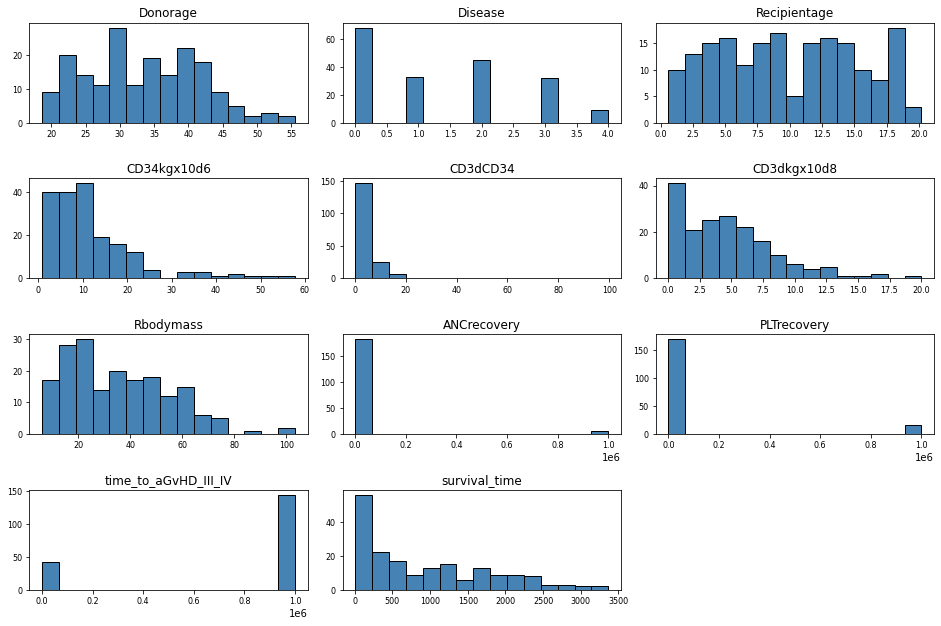

In [23]:
transplants.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 2.2, 2.2))

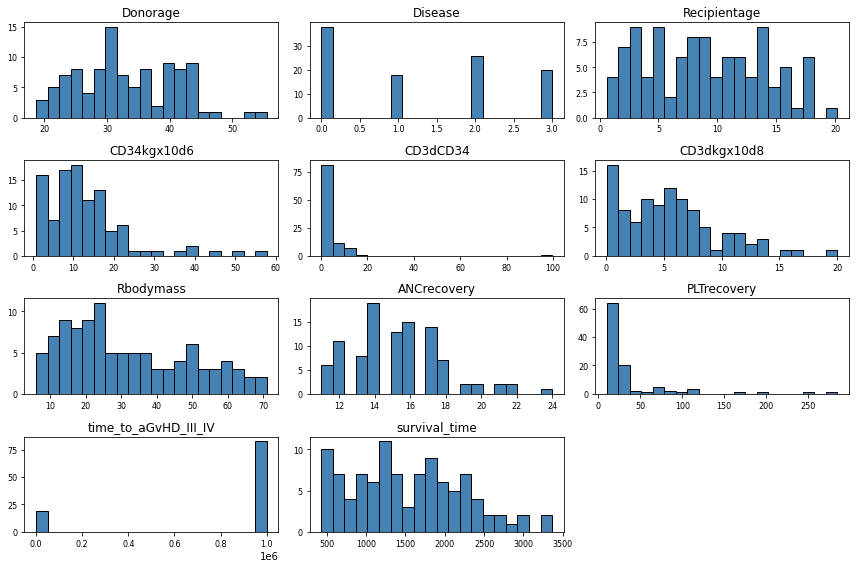

In [24]:
transplant_alive.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 2, 2))

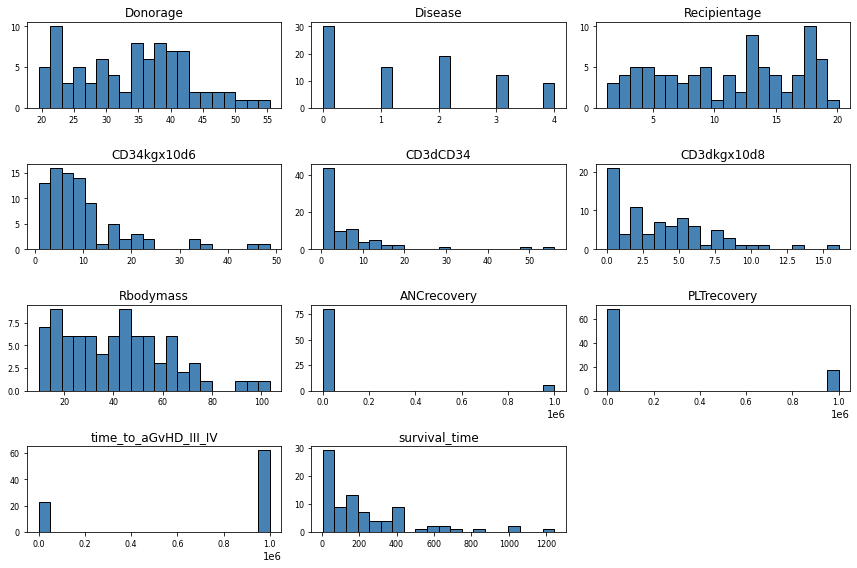

In [25]:
transplant_dead.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 2, 2))

Alive patients seem to have a more constant slowdown of CD3dkgx10d8 dosage than patients that are dead now.
The survival_time of dead patients is obviously not as long as alive patients'.
Interestingly, there seems to be no patient that is alive now that had a disease of type "4" which would be a lymphoma.


The purpose of the study was, to show the connection between survival time and  CD34+ cells per kg.
Therefore I will take a closer look at these two values in combination with the survival_status itself.

<AxesSubplot:title={'center':'Alive patients'}, xlabel='CD34+ cell dose per kg', ylabel='Density'>

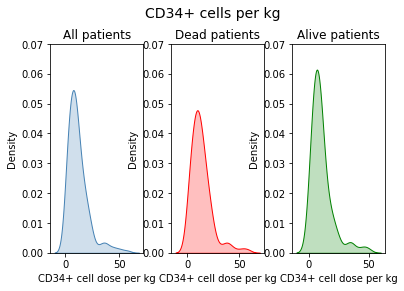

In [26]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("CD34+ cells per kg", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,3, 1)
ax1.set_title("All patients")
ax1.set_xlabel("CD34+ cell dose per kg")
ax1.set_ylabel("Density")
ax1.set_ylim([0, 0.07])
sns.kdeplot(transplants['CD34kgx10d6'], ax=ax1, shade=True, color='steelblue')

ax2 = fig.add_subplot(1,3, 2)
ax2.set_title("Dead patients")
ax2.set_xlabel("CD34+ cell dose per kg")
ax2.set_ylabel("Density")
ax2.set_ylim([0, 0.07])
sns.kdeplot(transplant_alive['CD34kgx10d6'], ax=ax2, shade=True, color='red')

ax3 = fig.add_subplot(1,3, 3)
ax3.set_title("Alive patients")
ax3.set_xlabel("CD34+ cell dose per kg")
ax3.set_ylabel("Density")
ax3.set_ylim([0, 0.07])
sns.kdeplot(transplant_dead['CD34kgx10d6'], ax=ax3, shade=True, color='green')

It really seems like patients that are dead now had a lower concentration of CD34+ cells, compared to patients that are still alive.

# Multivariate Analysis

Next I checked if there is a connection between


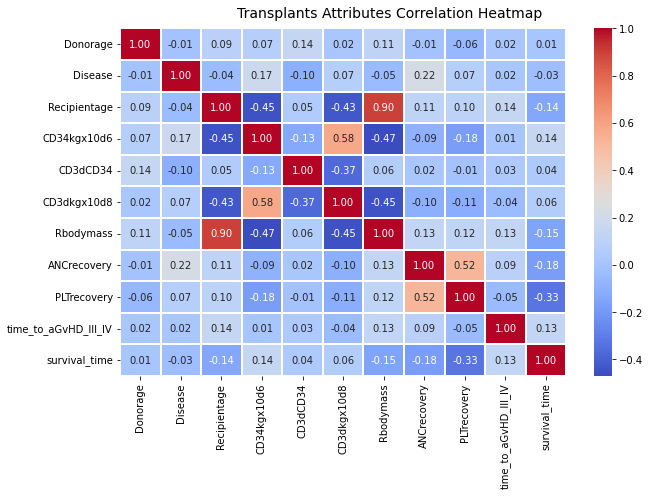

In [27]:
f, ax = plt.subplots(figsize=(10, 6))
corr = transplants.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Transplants Attributes Correlation Heatmap', fontsize=14)

There seems to be a connection between the following attributes:

| Rbodymass | Recipientage |
| PLTrecovery | ANCrecovery |
| CD3dkgx10d8 | CD34kgx10d6 |

However, there is no apparent strong connection between survival_time and any of the other numerical metrics.
The correlation of CD34+ concentration and the survival_status however, seems to be not as strong as previously hoped for. With only an r-value of 0.14, it's not a very strong correlation.

The above graph also does not show the riskgroup. Therefore I plotted the riskgroup against the survival_time.

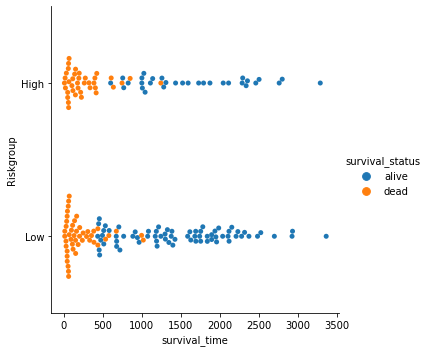

In [28]:
transplants_riskgroup_cat = transplants.copy()
riskgroup_dict = {1: 'High', 0: 'Low'}
transplants_riskgroup_cat['Riskgroup'] = pd.to_numeric(transplants['Riskgroup']).map(riskgroup_dict)
transplants_riskgroup_cat.head()

sns.catplot(y="Riskgroup", x="survival_time", hue="survival_status", kind="swarm", data=transplants_riskgroup_cat)

It seems that there are more patients that die early that are in the "low" risk group, which seems odd.
Maybe there are just more patients in the low risk group?

In [29]:

transplants_riskgroup_cat['Riskgroup'].value_counts()


Low     118
High     69
Name: Riskgroup, dtype: int64

Yes, there are. To get a more accurate representation I would have to down or upsample the data to get an equal distribution.

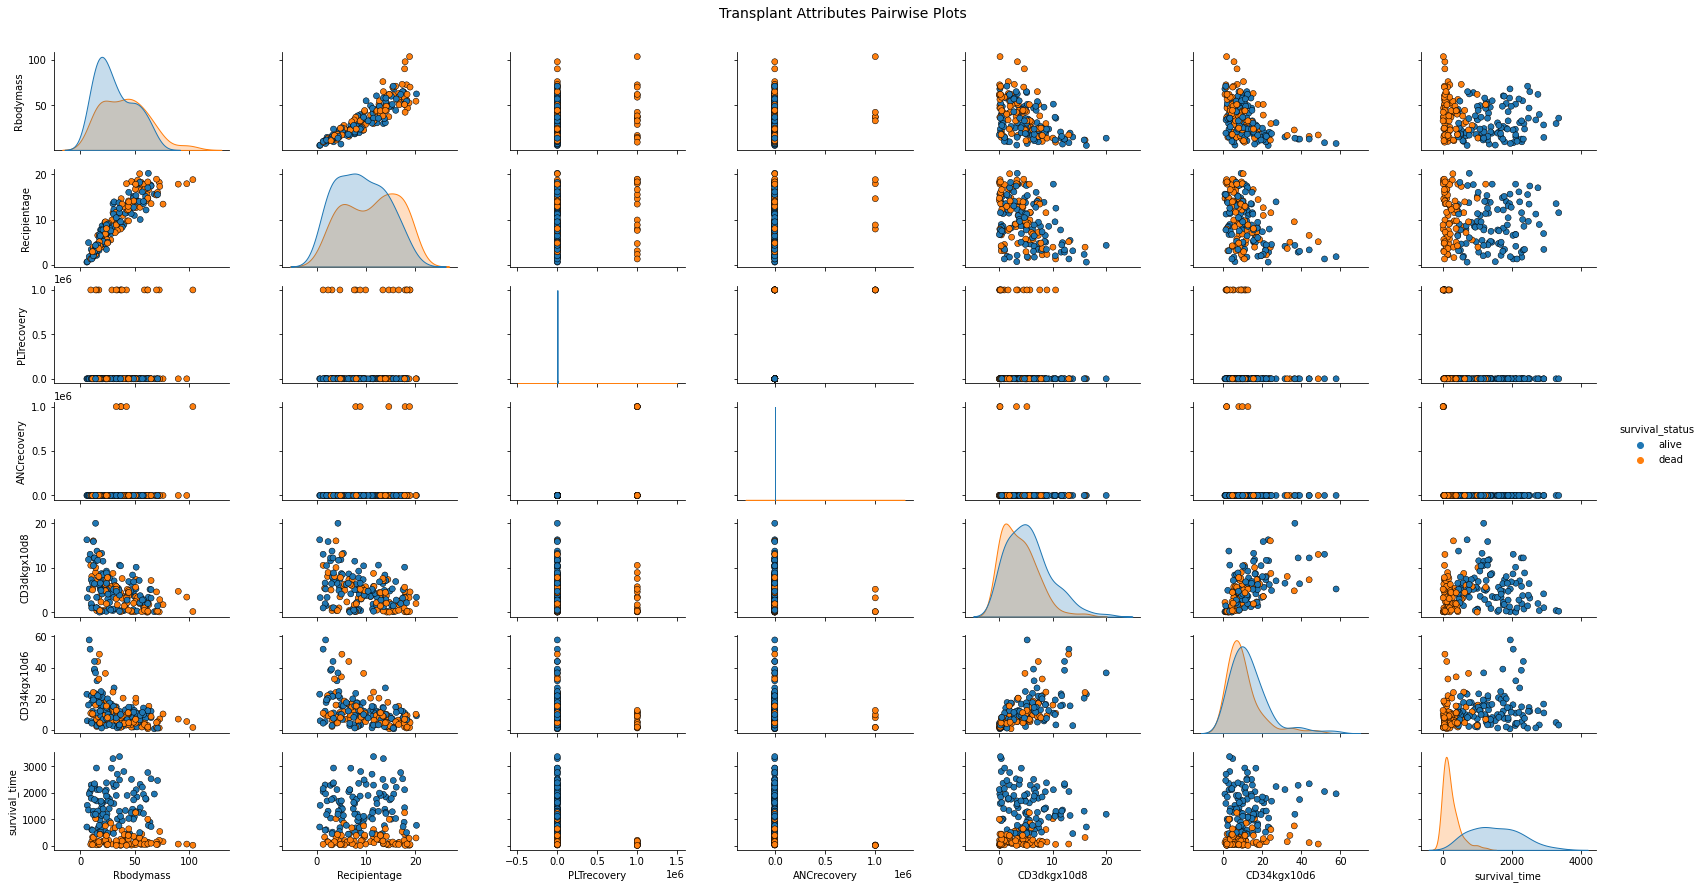

In [30]:
cols = ['Rbodymass', 'Recipientage', 'PLTrecovery', 'ANCrecovery', 'CD3dkgx10d8', 'CD34kgx10d6', 'survival_time', 'survival_status']
pp = sns.pairplot(transplants[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True), hue="survival_status")

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Transplant Attributes Pairwise Plots', fontsize=14)

One of the main findings via these graphs is, that a lot of the patients that are dead now, did not survive for very long.
Also there is a small portion of patients that where older and had a high Bodymass that died.
There is also a number of patients that had a higher Bodymass index of > ~50 that survived.
The distributions of patient that died seems not to be strongly coupled with the age of the recipients.

These graphs also confirm the findings, that the correlation heatmap showed.

Another thing that seems to be interesting is, that there is a relatively clear-cut in time, when patients die. To show this I took a look at this specific attributes.


<AxesSubplot:xlabel='survival_time', ylabel='Density'>

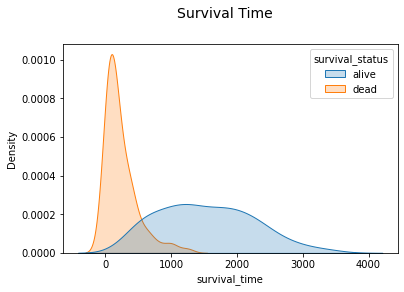

In [31]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Survival Time", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)

sns.kdeplot(data = transplants, x="survival_time", ax=ax1, shade=True, color='steelblue', hue="survival_status")



There is an intersection of the time patients died after transplantation.
This timeframe seems to be between 0 and 1000.
So one could say, that it is not likely that patients will die if they survived the first ~650 days after transplantation.

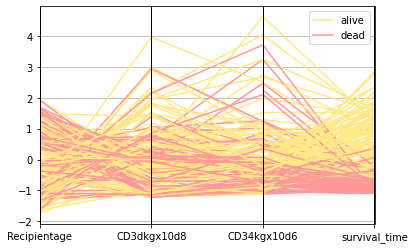

In [32]:
cols = [ 'Recipientage', 'CD3dkgx10d8', 'CD34kgx10d6', 'survival_time']
subset_df = transplants[cols]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, transplants['survival_status']], axis=1)

pc = parallel_coordinates(final_df, 'survival_status', color=('#FFE888', '#FF9999'))

There seems to be no strong connection between the Age of the receipient, the CD3dkgx10d8 and the CD34kgx10d6.
There is a connection between survival_time and survival_status. Patients that are dead often had a lower survival_time as patients who are still alive. Which seems plausible.

<AxesSubplot:xlabel='survival_status', ylabel='CD34kgx10d6'>

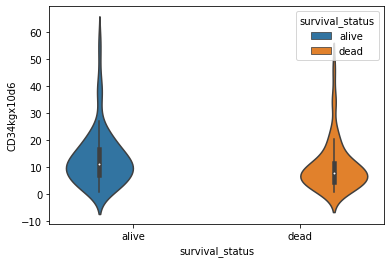

In [33]:
sns.violinplot(y="CD34kgx10d6", x="survival_status", hue="survival_status", data=transplants)

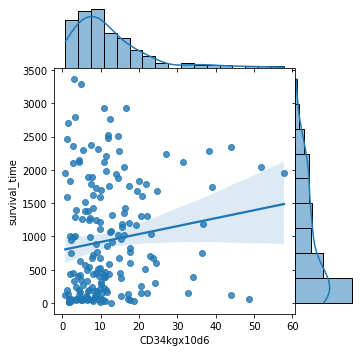

In [34]:
jp = sns.jointplot(x='CD34kgx10d6', y='survival_time', data=transplants,
              kind='reg', space=0, height=5, ratio=4)

There is only a very minor correlation between CD34+ concentration and survival_time. The violinplot and jointplot confirm that.

### Findings:

There is a small correlation between the concentraion of CD34+ cells and survival_time.
There seems to be a cut-off at ~650 days of survival. After that, patients did not die.
There is also a number of patients that had a higher Bodymass index of > ~50 that survived.
CD34kgx10d6 and CD3dkgx10d8  values are connected to each other.